In [1]:
#각종 패키지 삽입
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud
import pandas as pd
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
#colab에 데이터 넣기
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 크림_브랜드별_신발_제품.csv to 크림_브랜드별_신발_제품.csv
User uploaded file "크림_브랜드별_신발_제품.csv" with length 2108919 bytes


In [3]:
#데이터 불러오기
data=pd.read_csv('크림_브랜드별_신발_제품.csv')
data.head()

,검색어,브랜드,제품명,제품한글명,가격,거래량,관심수,url
0,A.P.C.,Nike,Nike x A.P.C. Dunk High '08 SP Beige,나이키 x 아페쎄 덩크 하이 '08 SP 베이지,"280,000원",1,57,https://kream.co.kr/products/34916
1,A.P.C.,Nike,Nike x A.P.C. Blazer Mid Vintage White Midnigh...,나이키 x 아페쎄 블레이저 미드 빈티지 화이트 미드나잇 네이비,-,NaN,17,https://kream.co.kr/products/3841
2,Ader Error,Puma,Puma x Ader Error Vaderon White,NaN,"260,000원",530,2352,https://kream.co.kr/products/54312
3,Ader Error,Birkenstock,Birkenstock x Ader Error A630 Black,NaN,"220,000원",311,1400,https://kream.co.kr/products/62262
4,Ader Error,Camper,(W) Camper x Ader Error Proto-111-S Cinder Bas...,NaN,"410,000원",21,134,https://kream.co.kr/products/36842


In [4]:
# 거래량 전처리
data["거래량"]=data["거래량"].fillna(0)
data["거래량"]=pd.DataFrame(data["거래량"].str.replace(',',''))
data["거래량"]=pd.DataFrame(data["거래량"].str.replace('.',''))
data["거래량"]=pd.DataFrame(data["거래량"].str.replace('만',"000"))
data["거래량"]=pd.to_numeric(data["거래량"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [5]:
#관심수 전처리
data["관심수"]=pd.DataFrame(data["관심수"].str.replace(',',''))
data["관심수"]=pd.DataFrame(data["관심수"].str.replace('.',''))
data["관심수"]=pd.DataFrame(data["관심수"].str.replace('만',"000"))
data["관심수"]=pd.to_numeric(data["관심수"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#크롤링 잘못된 'Camper' 데이터 삭제
drop_index=data[data['검색어']=='Camper'].index
data=data.drop(drop_index)
data.sort_values('관심수',ascending=False)

,검색어,브랜드,제품명,제품한글명,가격,거래량,관심수,url
8638,Nike,Nike,Nike Dunk Low Retro Black,NaN,"173,000원",195000.0,104000,https://kream.co.kr/products/28029
8639,Nike,Nike,Nike Air Force 1 '07 Low White,NaN,"140,000원",117000.0,98000,https://kream.co.kr/products/12831
2877,Jordan,Jordan,(W) Jordan 1 Low White Wolf Grey,NaN,"298,000원",28000.0,61000,https://kream.co.kr/products/36237
2875,Jordan,Jordan,(W) Jordan 1 Mid Wolf Grey,NaN,"239,000원",18000.0,58000,https://kream.co.kr/products/37241
8644,Nike,Nike,(W) Nike Air Force 1 '07 Low White,NaN,"134,000원",58000.0,57000,https://kream.co.kr/products/13100
...,...,...,...,...,...,...,...,...
18005,Saint Laurent,Saint Laurent,Saint Laurent Venice Sneakers in Canvas Off Wh...,NaN,-,NaN,0,https://kream.co.kr/products/67375
16080,Nike,Nike,Nike Air Zoom Elite 8 Total Orange Ghost Green,NaN,-,NaN,0,https://kream.co.kr/products/42346
16079,Nike,Nike,Nike Air Huarache Cool Grey Bright Crimson,NaN,-,NaN,0,https://kream.co.kr/products/42370
10377,Nike,Nike,(GS) Nike Air Max Tavas Black White,NaN,"96,000원",NaN,0,https://kream.co.kr/products/43667


In [7]:
#가중치 부여
data['거래량']=data['거래량'].fillna(0)
data['가중치']=data['거래량']*0.6+data['관심수']*0.4
data

,검색어,브랜드,제품명,제품한글명,가격,거래량,관심수,url,가중치
0,A.P.C.,Nike,Nike x A.P.C. Dunk High '08 SP Beige,나이키 x 아페쎄 덩크 하이 '08 SP 베이지,"280,000원",1.0,57,https://kream.co.kr/products/34916,23.4
1,A.P.C.,Nike,Nike x A.P.C. Blazer Mid Vintage White Midnigh...,나이키 x 아페쎄 블레이저 미드 빈티지 화이트 미드나잇 네이비,-,0.0,17,https://kream.co.kr/products/3841,6.8
2,Ader Error,Puma,Puma x Ader Error Vaderon White,NaN,"260,000원",530.0,2352,https://kream.co.kr/products/54312,1258.8
3,Ader Error,Birkenstock,Birkenstock x Ader Error A630 Black,NaN,"220,000원",311.0,1400,https://kream.co.kr/products/62262,746.6
4,Ader Error,Camper,(W) Camper x Ader Error Proto-111-S Cinder Bas...,NaN,"410,000원",21.0,134,https://kream.co.kr/products/36842,66.2
...,...,...,...,...,...,...,...,...,...
20179,Yeezy,Adidas,(Kids) Adidas Yeezy Boost 350 V2 Lundmark,NaN,-,0.0,8,https://kream.co.kr/products/21255,3.2
20180,Yeezy,Adidas,(W) Adidas Yeezy 950 Moonrock,NaN,-,0.0,3,https://kream.co.kr/products/5831,1.2
20181,Yeezy,Adidas,(W) Adidas Yeezy 950 Turtle Dove,NaN,-,0.0,2,https://kream.co.kr/products/5829,0.8
20182,Yeezy,Adidas,Adidas Yeezy 950 Peyote,NaN,-,0.0,8,https://kream.co.kr/products/5828,3.2


In [10]:
# 가중치 기준 브랜드 뽑아내기
sorted_data=data.groupby(["브랜드"]).mean().sort_values(by=['가중치'],ascending=False)
sorted_data

,거래량,관심수,가중치
브랜드,,,
Jordan,408.652553,829.674531,577.061345
New Balance,346.638095,388.590476,363.419048
Nike,239.256877,481.111149,335.998585
Converse,138.934211,445.893725,261.718016
Adidas,9.384473,524.441774,215.407394
...,...,...,...
Valentino,0.000000,1.000000,0.400000
Fendi,0.000000,0.800000,0.320000
Roger Vivier,0.000000,0.690476,0.276190


In [11]:
#워드 클라우딩 할 브랜드 추출 
brand_list=sorted_data.index
brand_list

Index(['Jordan', 'New Balance', 'Nike', 'Converse', 'Adidas', 'Camper',
       'Oofos', 'Autry', 'Asics', 'Louis Vuitton', 'Maison Margiela',
       'Common Projects', 'Crocs', 'Keen', 'Salomon', 'Hoka One One',
       'Mihara Yasuhiro', 'Ader Error', 'Birkenstock', 'Y-3', 'Vans',
       'Alexander McQueen', 'Chanel', 'Golden Goose', 'Merrell', 'Balenciaga',
       'Dior', 'Supreme', 'Reebok', 'Dr. Martens', 'Puma', 'Mizuno', 'Hermes',
       'Palace', 'Bottega Veneta', 'Clarks', 'Axel Arigato', 'Timberland',
       'Essentials', 'Yeezy', 'Lemaire', 'Prada', 'BAPE', 'Celine', 'Sunnei',
       'Suicoke', 'Miu Miu', 'Gucci', 'Saint Laurent', 'Loewe', 'Burberry',
       'G/Fore', 'Jil Sander', 'Thom Browne', 'Barbour', 'Gallery Dept.',
       'Tod's', 'Moncler', 'Isabel Marant', 'Salvatore Ferragamo', 'Valentino',
       'Fendi', 'Roger Vivier', 'Marni', 'Kenzo'],
      dtype='object', name='브랜드')

Jordan


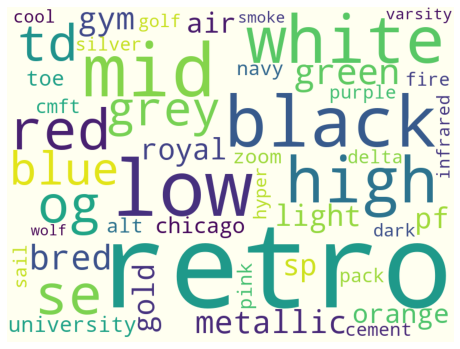






------------------------------------------





New Balance


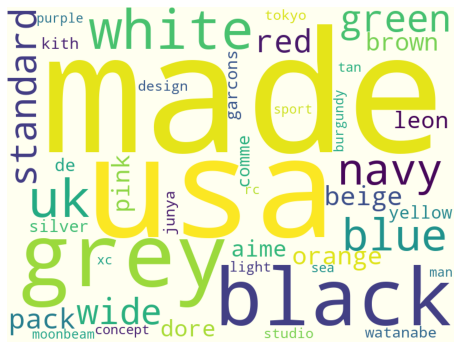






------------------------------------------





Nike


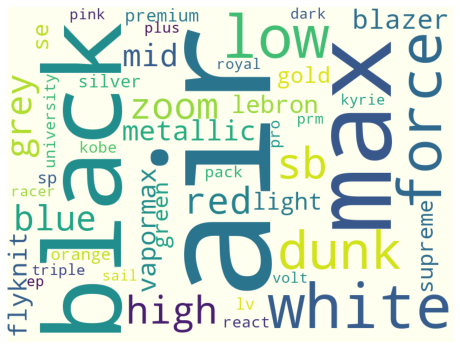






------------------------------------------





Converse


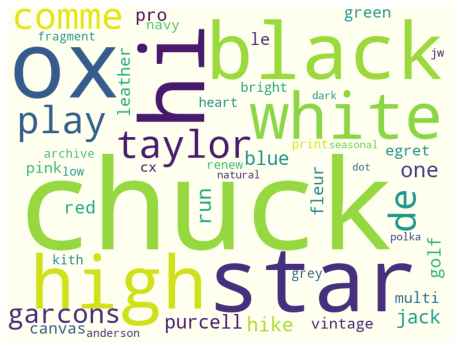






------------------------------------------





Adidas


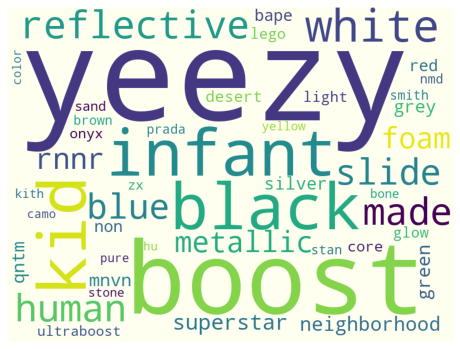






------------------------------------------





Camper


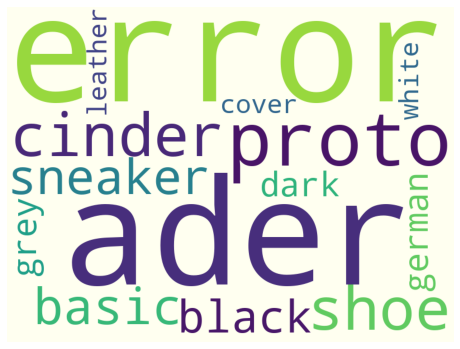






------------------------------------------





Oofos


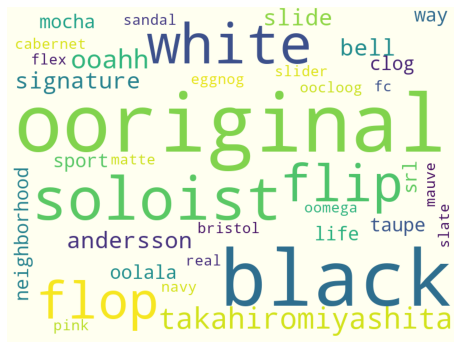






------------------------------------------





Autry


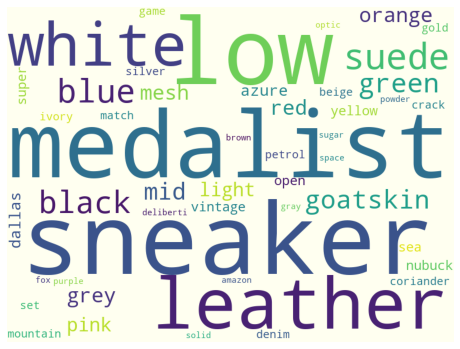






------------------------------------------





Asics


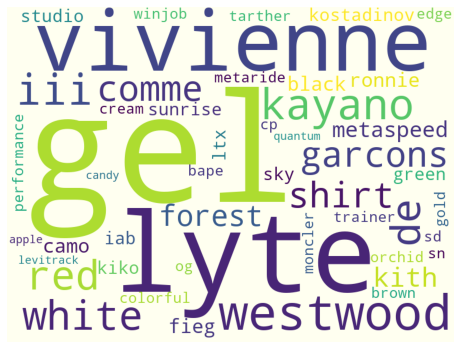






------------------------------------------





Louis Vuitton


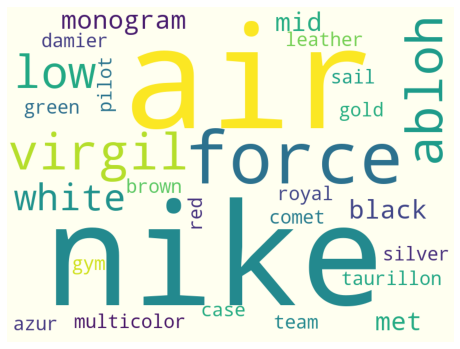






------------------------------------------







In [12]:
#워드 클라우딩 : Top 10
#워드 클라우딩에 브랜드명 제거해서 보여줌

stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

top10=brand_list[:10]

for i in range(len(top10)):
  clouding_brand=data[data['브랜드']==brand_list[i]]
  clouding_brand_name=clouding_brand['제품명'].str.replace(brand_list[i],'')

  words=[]

  for title in clouding_brand_name:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

  words2 = list(reduce(lambda x, y: x+y, words)) #1차원 리스트로 변환

  count = Counter(words2)
  word_count=dict()

  for tag,counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag]=counts


  print(brand_list[i])

  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width=800, height=600)
  cloud=wc.generate_from_frequencies(word_count)
  plt.figure(figsize=(8,8))
  plt.imshow(cloud)
  plt.axis('off')
  plt.show()
  print("\n\n\n\n")
  print("------------------------------------------")
  print("\n\n\n\n")